# 1. Import Library

In [59]:
import os
import pandas as pd
import difflib
from collections import defaultdict
import csv
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split


# 2. Load Processed Dataset

In [6]:
data_path = r"engineered_data_final.csv"


In [7]:
df = pd.read_csv(data_path)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315 entries, 0 to 314
Data columns (total 7 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Địa phương                                  315 non-null    int64  
 1   Năm                                         315 non-null    int64  
 2   Vùng kinh tế                                315 non-null    int64  
 3   Tiền đầu tư giáo dục                        315 non-null    float64
 4   Dân số trung bình                           315 non-null    float64
 5   Mật độ dân số                               315 non-null    float64
 6   Điểm thi đại học trung bình của địa phương  315 non-null    float64
dtypes: float64(4), int64(3)
memory usage: 17.4 KB


In [9]:
df.describe()

,Địa phương,Năm,Vùng kinh tế,Tiền đầu tư giáo dục,Dân số trung bình,Mật độ dân số,Điểm thi đại học trung bình của địa phương
count,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000
mean,31.000000,2020.000000,2.507937,0.949023,7.135180,5.730927,5.939602
std,18.213175,1.416464,1.792349,0.848805,0.578922,0.993517,0.973514
min,0.000000,2018.000000,0.000000,0.027806,5.743003,3.912023,3.690686
25%,15.000000,2019.000000,1.000000,0.540165,6.774658,4.927254,5.238326
50%,31.000000,2020.000000,2.000000,0.750797,7.117287,5.605802,5.857310
75%,47.000000,2021.000000,4.000000,1.039475,7.430696,6.507278,6.589629
max,62.000000,2022.000000,5.000000,10.308810,9.147371,8.407602,8.283732


In [10]:
df.head()

,Địa phương,Năm,Vùng kinh tế,Tiền đầu tư giáo dục,Dân số trung bình,Mật độ dân số,Điểm thi đại học trung bình của địa phương
0,14,2018,2,0.434603,6.741110,4.670490,4.382694
1,14,2019,2,0.485911,6.754721,4.682131,4.215383
2,14,2020,2,0.422106,6.768769,4.700480,5.221484
3,14,2021,2,0.474379,6.787946,4.718499,5.680538
4,14,2022,2,0.554896,6.794273,4.727388,5.299501


In [3]:
id_to_province = {
    0: 'An Giang',
    1: 'Bà Rịa - Vũng Tàu',
    2: 'Bình Dương',
    3: 'Bình Phước',
    4: 'Bình Thuận',
    5: 'Bình Định',
    6: 'Bạc Liêu',
    7: 'Bắc Giang',
    8: 'Bắc Kạn',
    9: 'Bắc Ninh',
    10: 'Bến Tre',
    11: 'Cao Bằng',
    12: 'Cà Mau',
    13: 'Gia Lai',
    14: 'Hà Giang',
    15: 'Hà Nam',
    16: 'Hà Nội',
    17: 'Hà Tĩnh',
    18: 'Hòa Bình',
    19: 'Hưng Yên',
    20: 'Hải Dương',
    21: 'Hải Phòng',
    22: 'Hậu Giang',
    23: 'Khánh Hòa',
    24: 'Kiên Giang',
    25: 'Kon Tum',
    26: 'Lai Châu',
    27: 'Long An',
    28: 'Lào Cai',
    29: 'Lâm Đồng',
    30: 'Lạng Sơn',
    31: 'Nam Định',
    32: 'Nghệ An',
    33: 'Ninh Bình',
    34: 'Ninh Thuận',
    35: 'Phú Thọ',
    36: 'Phú Yên',
    37: 'Quảng Bình',
    38: 'Quảng Nam',
    39: 'Quảng Ngãi',
    40: 'Quảng Ninh',
    41: 'Quảng Trị',
    42: 'Sóc Trăng',
    43: 'Sơn La',
    44: 'TP. Cần Thơ',
    45: 'TP. Hồ Chí Minh',
    46: 'Thanh Hóa',
    47: 'Thái Bình',
    48: 'Thái Nguyên',
    49: 'Thừa Thiên - Huế',
    50: 'Tiền Giang',
    51: 'Trà Vinh',
    52: 'Tuyên Quang',
    53: 'Tây Ninh',
    54: 'Vĩnh Long',
    55: 'Vĩnh Phúc',
    56: 'Yên Bái',
    57: 'Điện Biên',
    58: 'Đà Nẵng',
    59: 'Đắk Lắk',
    60: 'Đắk Nông',
    61: 'Đồng Nai',
    62: 'Đồng Tháp'
}


In [4]:
id_to_region = {
    0: 'Vùng Bắc Trung Bộ và duyên hải miền Trung',
    1: 'Vùng Tây Nguyên',
    2: 'Vùng trung du và miền núi phía Bắc',
    3: 'Vùng Đông Nam Bộ',
    4: 'Vùng đồng bằng sông Cửu Long',
    5: 'Vùng đồng bằng sông Hồng'
}

# 3. Split Data for Training, Validation, and Testing

In [69]:
# Filter data for training set (years 2018, 2019, 2020, 2021)
train_validation_data = df[df['Năm'].isin([2018, 2019, 2020, 2021])]

X_train_validation = train_validation_data.drop(columns=['Năm', 'Điểm thi đại học trung bình của địa phương'])
y_train_validation = train_validation_data['Điểm thi đại học trung bình của địa phương']


X_train, X_validation, y_train, y_validation = train_test_split(X_train_validation, y_train_validation, test_size=0.2, random_state=16)


# Filter data for test set (year 2022)
test_data = df[df['Năm'] == 2022]

X_test = test_data.drop(columns=['Năm', 'Điểm thi đại học trung bình của địa phương'])
y_test = test_data['Điểm thi đại học trung bình của địa phương']

In [70]:
# Information for training set
print("Training Set:")
print("Number of samples:", len(X_train))
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print()

# Information for validation set
print("Validation Set:")
print("Number of samples:", len(X_validation))
print("X_validation shape:", X_validation.shape)
print("y_validation shape:", y_validation.shape)
print()

# Information for test set
print("Test Set:")
print("Number of samples:", len(X_test))
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


Training Set:
Number of samples: 201
X_train shape: (201, 5)
y_train shape: (201,)

Validation Set:
Number of samples: 51
X_validation shape: (51, 5)
y_validation shape: (51,)

Test Set:
Number of samples: 63
X_test shape: (63, 5)
y_test shape: (63,)


In [71]:
X_train.head()

,Địa phương,Vùng kinh tế,Tiền đầu tư giáo dục,Dân số trung bình,Mật độ dân số
303,42,4,0.564978,7.095744,5.902633
212,60,1,0.420212,6.458197,4.584967
41,28,2,0.938226,6.597555,4.744932
271,51,4,0.770248,6.917012,6.059123
216,29,1,0.678787,7.169581,4.890349


# 4. Training XGBoost Model

In [72]:
import xgboost as xgb

# Khởi tạo mô hình XGBoost
xgb_model = xgb.XGBRegressor(seed=7, learning_rate=0.0001, n_estimators=300, max_depth=5)

In [73]:
# Thiết lập các tham số cần tinh chỉnh
params = {
    'learning_rate': [0.1, 0.01, 0.001, 0.0001, 0.00001],
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
    'n_estimators': [100, 500, 1000],
}

In [54]:
# Sử dụng GridSearchCV để tìm bộ tham số tốt nhất
grid_search = GridSearchCV(estimator=xgb_model, param_grid=params, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

# In ra bộ tham số tốt nhất
print("Best parameters:", grid_search.best_params_)

Best parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}


# 5. Evaluation

In [74]:
# Huấn luyện mô hình với bộ tham số tốt nhất
best_xgb_model = grid_search.best_estimator_
best_xgb_model.fit(X_train, y_train)

# Dự đoán trên tập validation
y_pred_validation = best_xgb_model.predict(X_validation)

# Tính các metric
mae = mean_absolute_error(y_validation, y_pred_validation)
mse = mean_squared_error(y_validation, y_pred_validation)
rmse = np.sqrt(mse)
r2 = r2_score(y_validation, y_pred_validation)

# Xuất kết quả
print('Evaluation results on validation set:')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R^2): {r2}')


Evaluation results on validation set:
Mean Absolute Error (MAE): 0.8302441353568831
Mean Squared Error (MSE): 1.0824228268489862
Root Mean Squared Error (RMSE): 1.0403955146236388
R-squared (R^2): -0.08192091159306791


In [75]:
# Tạo DataFrame từ dữ liệu thực tế và dự đoán trên tập validation
df_validation_predictions = pd.DataFrame({'True': y_validation, 'Predicted': y_pred_validation})

# Hiển thị DataFrame
print(df_validation_predictions)


         True  Predicted
265  5.638462   5.735858
240  4.539033   5.755253
272  5.632368   5.659080
8    5.801083   5.078339
0    4.382694   5.654827
88   7.223045   5.707124
228  7.907892   5.832303
36   5.535460   5.426995
140  4.370982   6.218599
191  5.898866   6.169511
12   6.424082   5.436983
40   4.515511   5.549798
157  6.246233   5.897423
85   4.833369   6.194201
195  5.450610   5.526542
87   6.526799   5.707124
258  6.256364   5.443999
208  5.419045   5.037718
266  5.506225   5.735858
48   8.134805   5.517261
96   6.032056   6.331168
1    4.215383   5.598612
253  6.297489   5.845206
220  6.102940   6.887171
278  6.940245   5.556253
186  4.797062   5.318400
31   4.348473   5.172899
248  6.738973   5.749693
80   5.035739   6.870877
282  7.180695   5.949991
230  5.554105   6.329237
37   6.741237   5.437238
300  5.325909   5.880206
76   5.658451   6.406244
65   5.194283   5.649540
147  5.684709   5.473736
188  5.667633   5.318400
98   8.081556   6.331168
97   7.314059   6.331168


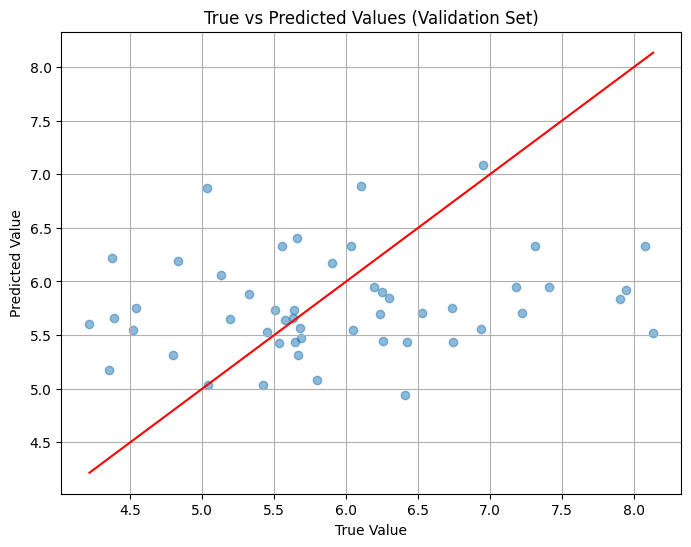

In [76]:
# Tạo DataFrame mới chứa điểm thực và điểm dự đoán
scatter_data = pd.DataFrame({'True Value': y_validation, 'Predicted Value': y_pred_validation})

# Vẽ scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(scatter_data['True Value'], scatter_data['Predicted Value'], alpha=0.5)
plt.plot([scatter_data.min().min(), scatter_data.max().max()], [scatter_data.min().min(), scatter_data.max().max()], color='red')  # Thêm đường thẳng y = x
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.title('True vs Predicted Values (Validation Set)')
plt.grid(True)
plt.show()